# 한글

In [1]:
from matplotlib import rc, font_manager as fm

# 나눔고딕 폰트 경로 설정
font_path = '../나눔고딕/NanumFontSetup_TTF_GOTHIC/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()

# 폰트 설정
rc('font', family=font_name)

# => 기존의 PET HeatMap을 이용하여 새로운 시도들을 해보기 위함

In [2]:
# 데이터 불러오기
import pandas as pd
df = pd.read_csv('data/for_model_total.csv')
df.drop(columns=['자치구'], inplace=True)

In [3]:
pet_column = df.pop('PET 총량')
df.insert(0, 'PET 총량', pet_column)
df.head(3)

,PET 총량,월평균_총생활인구수,연령대0_평균,연령대10_평균,연령대20_평균,연령대30_평균,연령대40_평균,연령대50_평균,연령대60_평균,연령대70이상_평균,...,연령대_60_거주인구수,연령대_70_거주인구수,연령대_80_거주인구수,연령대_90_거주인구수,유흥주점영업,단란주점,제과점영업,집단급식소,일반음식점,휴게음식점
0,2680.0,5.892936e+08,3.542718e+07,5.912810e+07,9.170488e+07,1.144680e+08,1.135606e+08,7.744400e+07,5.143368e+07,4.612720e+07,...,58011.583333,32993.833333,11749.000000,2105.083333,2782.0,3645.0,6117.0,5555.0,165890.0,50825.0
1,2886.3,3.672376e+08,2.948711e+07,3.649162e+07,4.277418e+07,5.701898e+07,6.077971e+07,5.486420e+07,4.517363e+07,4.064814e+07,...,57224.666667,27460.583333,9633.416667,1619.916667,1606.0,1097.0,1855.0,3263.0,47030.0,13467.0
2,1147.1,2.147731e+08,1.359185e+07,1.758728e+07,2.864519e+07,2.739157e+07,3.246074e+07,3.419978e+07,2.725101e+07,3.364569e+07,...,42903.250000,27084.000000,11068.083333,1329.916667,864.0,1472.0,932.0,1983.0,43348.0,8292.0


In [4]:
df['2030_거주인구수']=df['연령대_20_거주인구수'] + df['연령대_30_거주인구수']
df.head(2)

,PET 총량,월평균_총생활인구수,연령대0_평균,연령대10_평균,연령대20_평균,연령대30_평균,연령대40_평균,연령대50_평균,연령대60_평균,연령대70이상_평균,...,연령대_70_거주인구수,연령대_80_거주인구수,연령대_90_거주인구수,유흥주점영업,단란주점,제과점영업,집단급식소,일반음식점,휴게음식점,2030_거주인구수
0,2680.0,5.892936e+08,3.542718e+07,5.912810e+07,9.170488e+07,1.144680e+08,1.135606e+08,7.744400e+07,5.143368e+07,4.612720e+07,...,32993.833333,11749.000000,2105.083333,2782.0,3645.0,6117.0,5555.0,165890.0,50825.0,147280.083333
1,2886.3,3.672376e+08,2.948711e+07,3.649162e+07,4.277418e+07,5.701898e+07,6.077971e+07,5.486420e+07,4.517363e+07,4.064814e+07,...,27460.583333,9633.416667,1619.916667,1606.0,1097.0,1855.0,3263.0,47030.0,13467.0,115867.750000


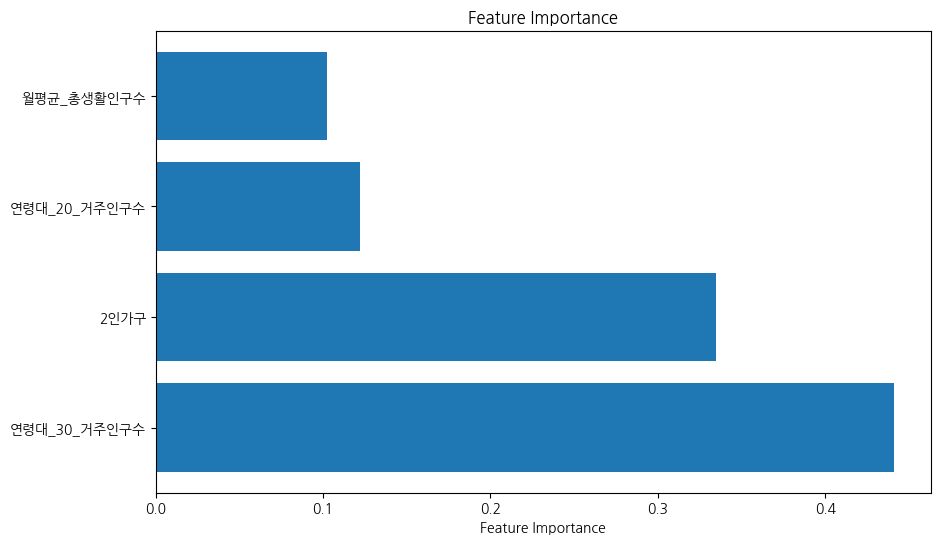

최적 n_estimators: 6
최적 MAE: 67.61111111111101
최적 RMSE: 73.56673589081961


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from math import sqrt

y = df.iloc[:, 0]
X = df[['연령대_20_거주인구수', '연령대_30_거주인구수', '월평균_총생활인구수', '2인가구']]

# 데이터 분할 (random_state 설정)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# n_estimators 범위
n_estimators_range = list(range(1,26))
best_n_estimators = None
best_mae = float('inf')  # MAE 최소화
best_rmse = float('inf')  # RMSE 최소화

# n_estimators 범위 평가 및 MAE, RMSE 기록
train_mae_scores = []  # 훈련 데이터 MAE를 기록할 리스트
test_mae_scores = []   # 테스트 데이터 MAE를 기록할 리스트
rmse_scores = []       # RMSE를 기록할 리스트

for n_estimators in n_estimators_range:
    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=10, random_state=0)
    model.fit(X_train, y_train)

    # Train Data MAE
    y_train_pred = model.predict(X_train)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mae_scores.append(train_mae)
    
    # Test Data MAE
    y_test_pred = model.predict(X_test)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mae_scores.append(test_mae)

    # RMSE 계산
    train_rmse = sqrt(np.mean((y_train - y_train_pred) ** 2))
    test_rmse = sqrt(np.mean((y_test - y_test_pred) ** 2))
    rmse_scores.append(test_rmse)

    # 현재의 n_estimators 값이 이전보다 더 좋으면 최적값 업데이트
    if test_mae < best_mae:
        best_mae = test_mae
        best_n_estimators = n_estimators

    if test_rmse < best_rmse:
        best_rmse = test_rmse

# 피처 중요도 계산
model = RandomForestRegressor(n_estimators=best_n_estimators, max_depth=10, random_state=0)
model.fit(X_train, y_train)
feature_importance = model.feature_importances_

# 피처 중요도를 내림차순으로 정렬
sorted_indices = feature_importance.argsort()[::-1]
sorted_features = X.columns[sorted_indices]
sorted_importance = feature_importance[sorted_indices]

# 피처 중요도 시각화
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(sorted_features, sorted_importance)
ax.set_xlabel('Feature Importance')
ax.set_title('Feature Importance')

# 그래프 출력
plt.show()


# MAE, RMSE, n_estimators 관계 시각화
fig = px.line(x=n_estimators_range, labels={'x': 'n_estimators', 'y': 'Score'}, title='Score vs n_estimators', width=1200, height=800)
fig.add_scatter(x=n_estimators_range, y=train_mae_scores, mode='lines+markers', name='Train Data MAE')
fig.add_scatter(x=n_estimators_range, y=test_mae_scores, mode='lines+markers', name='Test Data MAE')
fig.add_scatter(x=n_estimators_range, y=rmse_scores, mode='lines+markers', name='RMSE')
fig.update_traces(mode='lines+markers')

# Display the figure
fig.show()

# 최적값 출력
print(f"최적 n_estimators: {best_n_estimators}")
print(f"최적 MAE: {best_mae}")
print(f"최적 RMSE: {best_rmse}")


# 기존에 찾아놨던 애들 상관관게 높으므로 합침

In [6]:
df['3060_거주인구수']=df['연령대_30_거주인구수'] + df['연령대_60_거주인구수']
df['2060_생활인구수']=df['연령대20_평균'] + df['연령대60_평균']
df.head(2)

,PET 총량,월평균_총생활인구수,연령대0_평균,연령대10_평균,연령대20_평균,연령대30_평균,연령대40_평균,연령대50_평균,연령대60_평균,연령대70이상_평균,...,연령대_90_거주인구수,유흥주점영업,단란주점,제과점영업,집단급식소,일반음식점,휴게음식점,2030_거주인구수,3060_거주인구수,2060_생활인구수
0,2680.0,5.892936e+08,3.542718e+07,5.912810e+07,9.170488e+07,1.144680e+08,1.135606e+08,7.744400e+07,5.143368e+07,4.612720e+07,...,2105.083333,2782.0,3645.0,6117.0,5555.0,165890.0,50825.0,147280.083333,134120.916667,1.431386e+08
1,2886.3,3.672376e+08,2.948711e+07,3.649162e+07,4.277418e+07,5.701898e+07,6.077971e+07,5.486420e+07,4.517363e+07,4.064814e+07,...,1619.916667,1606.0,1097.0,1855.0,3263.0,47030.0,13467.0,115867.750000,119676.333333,8.794781e+07


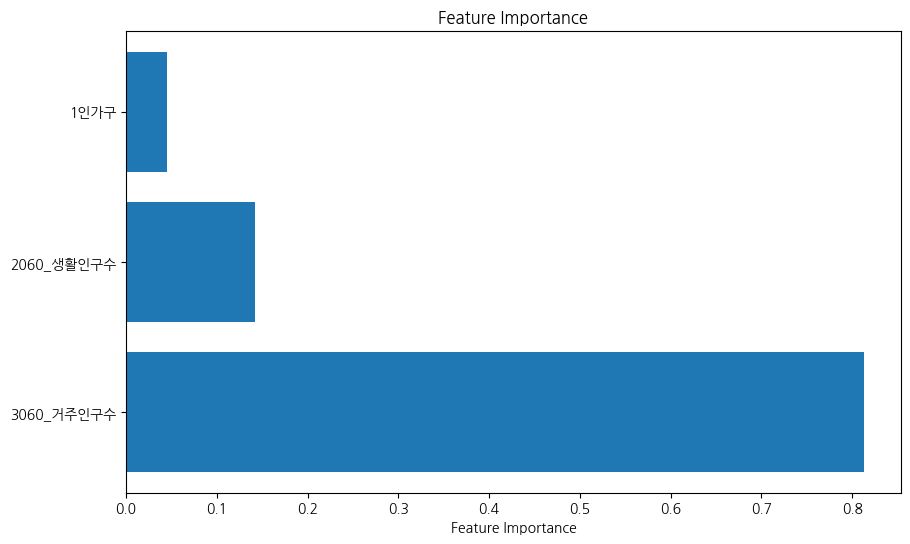

최적 n_estimators: 2
최적 MAE: 128.11666666666648
최적 RMSE: 169.0293934004772


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from math import sqrt

y = df.iloc[:, 0]
X = df[['3060_거주인구수', '2060_생활인구수', '1인가구']]

# 데이터 분할 (random_state 설정)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# n_estimators 범위
n_estimators_range = list(range(1,26))
best_n_estimators = None
best_mae = float('inf')  # MAE 최소화
best_rmse = float('inf')  # RMSE 최소화

# n_estimators 범위 평가 및 MAE, RMSE 기록
train_mae_scores = []  # 훈련 데이터 MAE를 기록할 리스트
test_mae_scores = []   # 테스트 데이터 MAE를 기록할 리스트
rmse_scores = []       # RMSE를 기록할 리스트

for n_estimators in n_estimators_range:
    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=10, random_state=0)
    model.fit(X_train, y_train)

    # Train Data MAE
    y_train_pred = model.predict(X_train)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mae_scores.append(train_mae)
    
    # Test Data MAE
    y_test_pred = model.predict(X_test)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mae_scores.append(test_mae)

    # RMSE 계산
    train_rmse = sqrt(np.mean((y_train - y_train_pred) ** 2))
    test_rmse = sqrt(np.mean((y_test - y_test_pred) ** 2))
    rmse_scores.append(test_rmse)

    # 현재의 n_estimators 값이 이전보다 더 좋으면 최적값 업데이트
    if test_mae < best_mae:
        best_mae = test_mae
        best_n_estimators = n_estimators

    if test_rmse < best_rmse:
        best_rmse = test_rmse

# 피처 중요도 계산
model = RandomForestRegressor(n_estimators=best_n_estimators, max_depth=15, random_state=0)
model.fit(X_train, y_train)
feature_importance = model.feature_importances_

# 피처 중요도를 내림차순으로 정렬
sorted_indices = feature_importance.argsort()[::-1]
sorted_features = X.columns[sorted_indices]
sorted_importance = feature_importance[sorted_indices]

# 피처 중요도 시각화
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(sorted_features, sorted_importance)
ax.set_xlabel('Feature Importance')
ax.set_title('Feature Importance')

# 그래프 출력
plt.show()


# MAE, RMSE, n_estimators 관계 시각화
fig = px.line(x=n_estimators_range, labels={'x': 'n_estimators', 'y': 'Score'}, title='Score vs n_estimators', width=1200, height=800)
fig.add_scatter(x=n_estimators_range, y=train_mae_scores, mode='lines+markers', name='Train Data MAE')
fig.add_scatter(x=n_estimators_range, y=test_mae_scores, mode='lines+markers', name='Test Data MAE')
fig.add_scatter(x=n_estimators_range, y=rmse_scores, mode='lines+markers', name='RMSE')
fig.update_traces(mode='lines+markers')

# Display the figure
fig.show()

# 최적값 출력
print(f"최적 n_estimators: {best_n_estimators}")
print(f"최적 MAE: {best_mae}")
print(f"최적 RMSE: {best_rmse}")


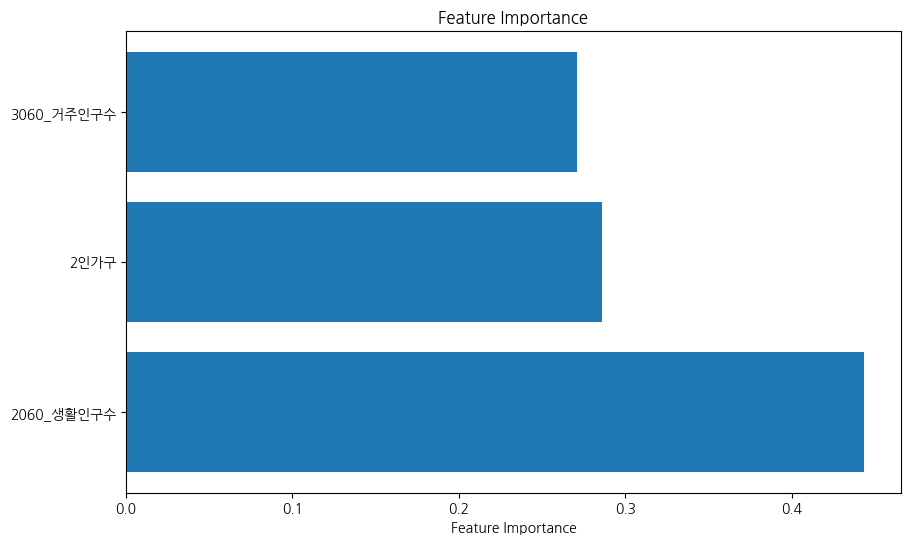

최적 n_estimators: 6
최적 MAE: 46.211111111111144
최적 RMSE: 73.08145506264961


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from math import sqrt

y = df.iloc[:, 0]
X = df[['3060_거주인구수', '2060_생활인구수', '2인가구']]

# 데이터 분할 (random_state 설정)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# n_estimators 범위
n_estimators_range = list(range(1,26))
best_n_estimators = None
best_mae = float('inf')  # MAE 최소화
best_rmse = float('inf')  # RMSE 최소화

# n_estimators 범위 평가 및 MAE, RMSE 기록
train_mae_scores = []  # 훈련 데이터 MAE를 기록할 리스트
test_mae_scores = []   # 테스트 데이터 MAE를 기록할 리스트
rmse_scores = []       # RMSE를 기록할 리스트

for n_estimators in n_estimators_range:
    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=10, random_state=0)
    model.fit(X_train, y_train)

    # Train Data MAE
    y_train_pred = model.predict(X_train)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mae_scores.append(train_mae)
    
    # Test Data MAE
    y_test_pred = model.predict(X_test)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mae_scores.append(test_mae)

    # RMSE 계산
    train_rmse = sqrt(np.mean((y_train - y_train_pred) ** 2))
    test_rmse = sqrt(np.mean((y_test - y_test_pred) ** 2))
    rmse_scores.append(test_rmse)

    # 현재의 n_estimators 값이 이전보다 더 좋으면 최적값 업데이트
    if test_mae < best_mae:
        best_mae = test_mae
        best_n_estimators = n_estimators

    if test_rmse < best_rmse:
        best_rmse = test_rmse

# 피처 중요도 계산
model = RandomForestRegressor(n_estimators=best_n_estimators, max_depth=15, random_state=0)
model.fit(X_train, y_train)
feature_importance = model.feature_importances_

# 피처 중요도를 내림차순으로 정렬
sorted_indices = feature_importance.argsort()[::-1]
sorted_features = X.columns[sorted_indices]
sorted_importance = feature_importance[sorted_indices]

# 피처 중요도 시각화
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(sorted_features, sorted_importance)
ax.set_xlabel('Feature Importance')
ax.set_title('Feature Importance')

# 그래프 출력
plt.show()


# MAE, RMSE, n_estimators 관계 시각화
fig = px.line(x=n_estimators_range, labels={'x': 'n_estimators', 'y': 'Score'}, title='Score vs n_estimators', width=1200, height=800)
fig.add_scatter(x=n_estimators_range, y=train_mae_scores, mode='lines+markers', name='Train Data MAE')
fig.add_scatter(x=n_estimators_range, y=test_mae_scores, mode='lines+markers', name='Test Data MAE')
fig.add_scatter(x=n_estimators_range, y=rmse_scores, mode='lines+markers', name='RMSE')
fig.update_traces(mode='lines+markers')

# Display the figure
fig.show()

# 최적값 출력
print(f"최적 n_estimators: {best_n_estimators}")
print(f"최적 MAE: {best_mae}")
print(f"최적 RMSE: {best_rmse}")


## 1021 PCA => heatmap 0.65상향 = 본인은 Top5(공동5위로 6가지로 해보기)

1인가구

In [19]:
df

,PET 총량,월평균_총생활인구수,연령대0_평균,연령대10_평균,연령대20_평균,연령대30_평균,연령대40_평균,연령대50_평균,연령대60_평균,연령대70이상_평균,...,연령대_90_거주인구수,유흥주점영업,단란주점,제과점영업,집단급식소,일반음식점,휴게음식점,2030_거주인구수,3060_거주인구수,2060_생활인구수
0,2680.0,5.892936e+08,3.542718e+07,5.912810e+07,9.170488e+07,1.144680e+08,1.135606e+08,7.744400e+07,5.143368e+07,4.612720e+07,...,2105.083333,2782.0,3645.0,6117.0,5555.0,165890.0,50825.0,147280.083333,134120.916667,1.431386e+08
1,2886.3,3.672376e+08,2.948711e+07,3.649162e+07,4.277418e+07,5.701898e+07,6.077971e+07,5.486420e+07,4.517363e+07,4.064814e+07,...,1619.916667,1606.0,1097.0,1855.0,3263.0,47030.0,13467.0,115867.750000,119676.333333,8.794781e+07
2,1147.1,2.147731e+08,1.359185e+07,1.758728e+07,2.864519e+07,2.739157e+07,3.246074e+07,3.419978e+07,2.725101e+07,3.364569e+07,...,1329.916667,864.0,1472.0,932.0,1983.0,43348.0,8292.0,72902.333333,77436.000000,5.589621e+07
3,1706.3,3.932681e+08,3.017993e+07,3.206075e+07,5.484733e+07,7.199565e+07,6.458018e+07,5.383710e+07,4.362611e+07,4.214109e+07,...,2298.833333,1561.0,2027.0,2501.0,4580.0,64909.0,19754.0,169298.083333,161954.916667,9.847344e+07
4,2877.2,3.680325e+08,1.803469e+07,2.493423e+07,8.159471e+07,6.884004e+07,5.407705e+07,4.650831e+07,3.582274e+07,3.822076e+07,...,1616.416667,2851.0,1798.0,3103.0,3266.0,94923.0,23939.0,182267.416667,137161.833333,1.174175e+08
5,1315.5,2.586844e+08,1.602181e+07,2.263567e+07,4.838317e+07,4.329571e+07,4.007139e+07,3.755222e+07,2.676349e+07,2.396088e+07,...,1127.000000,207.0,1004.0,1394.0,2141.0,49502.0,14033.0,107533.666667,90440.333333,7.514667e+07
6,1644.9,2.791766e+08,2.116669e+07,2.124486e+07,3.698564e+07,4.835033e+07,4.771972e+07,4.185870e+07,3.198917e+07,2.986146e+07,...,1352.250000,420.0,1160.0,1467.0,3097.0,51312.0,11901.0,101637.166667,103927.500000,6.897480e+07
7,811.7,1.596203e+08,8.063365e+06,9.202500e+06,2.543792e+07,3.087914e+07,2.728963e+07,2.555697e+07,1.802970e+07,1.516113e+07,...,798.750000,598.0,874.0,807.0,2300.0,34449.0,9065.0,66953.500000,64136.000000,4.346761e+07
8,1587.0,3.708985e+08,2.862122e+07,4.582537e+07,4.912459e+07,4.508514e+07,5.707942e+07,5.621155e+07,4.306797e+07,4.588322e+07,...,2316.666667,270.0,581.0,1777.0,3599.0,41563.0,14609.0,123713.666667,122239.416667,9.219256e+07
9,771.8,2.007010e+08,1.390507e+07,1.798793e+07,2.427823e+07,2.593962e+07,2.956132e+07,3.225372e+07,2.727839e+07,2.949675e+07,...,1535.166667,276.0,625.0,997.0,2440.0,28429.0,7358.0,75257.916667,83010.833333,5.155662e+07


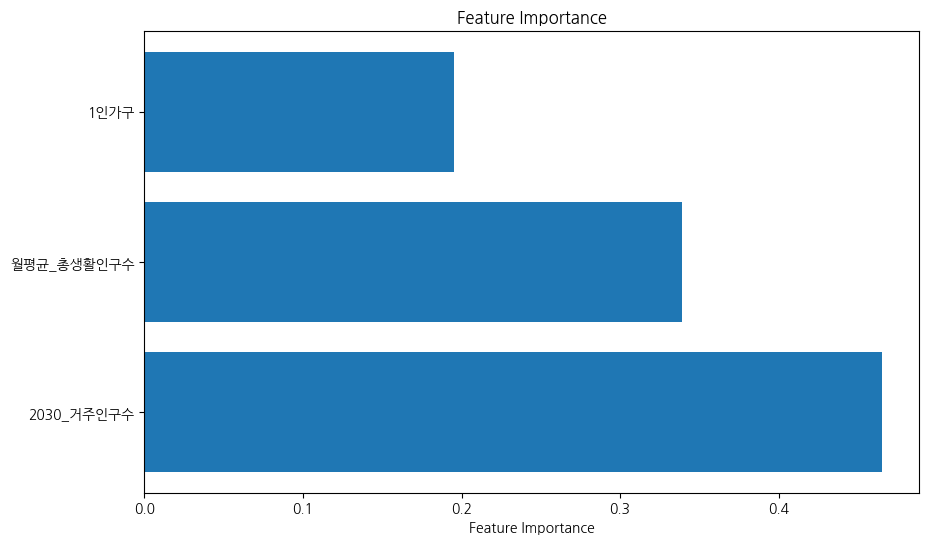

최적 n_estimators: 10
최적 MAE: 114.58333333333333
최적 RMSE: 148.32866670561907


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from math import sqrt

# X = df[['월평균_총생활인구수', '연령대60_평균', '연령대_20_거주인구수', '연령대_30_거주인구수', '1인가구','2인가구']]

y = df.iloc[:, 0]
X = df[['월평균_총생활인구수', '2030_거주인구수', '1인가구']]

# 데이터 분할 (random_state 설정)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# n_estimators 범위
n_estimators_range = list(range(1,26))
best_n_estimators = None
best_mae = float('inf')  # MAE 최소화
best_rmse = float('inf')  # RMSE 최소화

# n_estimators 범위 평가 및 MAE, RMSE 기록
train_mae_scores = []  # 훈련 데이터 MAE를 기록할 리스트
test_mae_scores = []   # 테스트 데이터 MAE를 기록할 리스트
rmse_scores = []       # RMSE를 기록할 리스트

for n_estimators in n_estimators_range:
    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=10, random_state=0)
    model.fit(X_train, y_train)

    # Train Data MAE
    y_train_pred = model.predict(X_train)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mae_scores.append(train_mae)
    
    # Test Data MAE
    y_test_pred = model.predict(X_test)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mae_scores.append(test_mae)

    # RMSE 계산
    train_rmse = sqrt(np.mean((y_train - y_train_pred) ** 2))
    test_rmse = sqrt(np.mean((y_test - y_test_pred) ** 2))
    rmse_scores.append(test_rmse)

    # 현재의 n_estimators 값이 이전보다 더 좋으면 최적값 업데이트
    if test_mae < best_mae:
        best_mae = test_mae
        best_n_estimators = n_estimators

    if test_rmse < best_rmse:
        best_rmse = test_rmse

# 피처 중요도 계산
model = RandomForestRegressor(n_estimators=best_n_estimators, max_depth=15, random_state=0)
model.fit(X_train, y_train)
feature_importance = model.feature_importances_

# 피처 중요도를 내림차순으로 정렬
sorted_indices = feature_importance.argsort()[::-1]
sorted_features = X.columns[sorted_indices]
sorted_importance = feature_importance[sorted_indices]

# 피처 중요도 시각화
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(sorted_features, sorted_importance)
ax.set_xlabel('Feature Importance')
ax.set_title('Feature Importance')

# 그래프 출력
plt.show()


# MAE, RMSE, n_estimators 관계 시각화
fig = px.line(x=n_estimators_range, labels={'x': 'n_estimators', 'y': 'Score'}, title='Score vs n_estimators', width=1200, height=800)
fig.add_scatter(x=n_estimators_range, y=train_mae_scores, mode='lines+markers', name='Train Data MAE')
fig.add_scatter(x=n_estimators_range, y=test_mae_scores, mode='lines+markers', name='Test Data MAE')
fig.add_scatter(x=n_estimators_range, y=rmse_scores, mode='lines+markers', name='RMSE')
fig.update_traces(mode='lines+markers')

# Display the figure
fig.show()

# 최적값 출력
print(f"최적 n_estimators: {best_n_estimators}")
print(f"최적 MAE: {best_mae}")
print(f"최적 RMSE: {best_rmse}")


In [10]:
# 2인가구

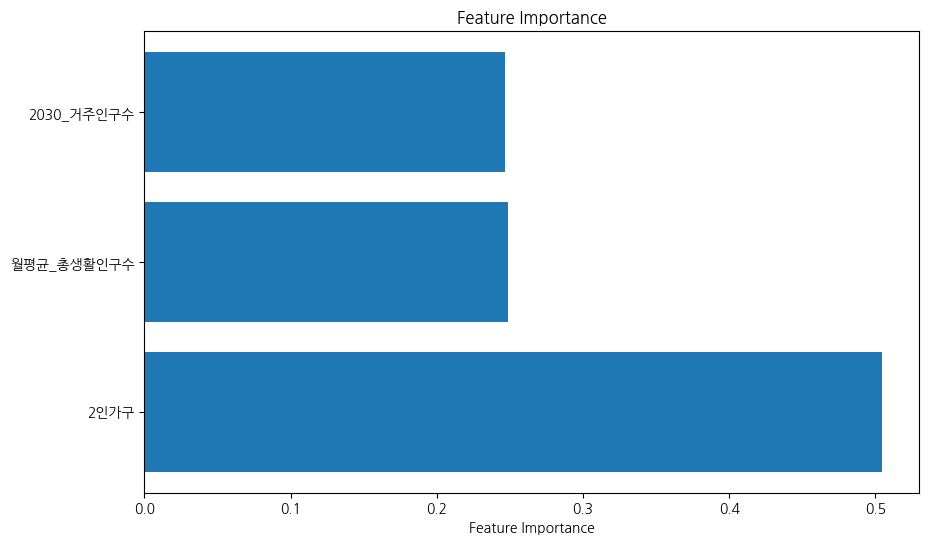

최적 n_estimators: 7
최적 MAE: 85.82380952380966
최적 RMSE: 111.89815856910471


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from math import sqrt

# X = df[['월평균_총생활인구수', '연령대60_평균', '연령대_20_거주인구수', '연령대_30_거주인구수', '1인가구','2인가구']]

y = df.iloc[:, 0]
X = df[['월평균_총생활인구수', '2030_거주인구수', '2인가구']]

# 데이터 분할 (random_state 설정)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# n_estimators 범위
n_estimators_range = list(range(1,26))
best_n_estimators = None
best_mae = float('inf')  # MAE 최소화
best_rmse = float('inf')  # RMSE 최소화

# n_estimators 범위 평가 및 MAE, RMSE 기록
train_mae_scores = []  # 훈련 데이터 MAE를 기록할 리스트
test_mae_scores = []   # 테스트 데이터 MAE를 기록할 리스트
rmse_scores = []       # RMSE를 기록할 리스트

for n_estimators in n_estimators_range:
    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=10, random_state=0)
    model.fit(X_train, y_train)

    # Train Data MAE
    y_train_pred = model.predict(X_train)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mae_scores.append(train_mae)
    
    # Test Data MAE
    y_test_pred = model.predict(X_test)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mae_scores.append(test_mae)

    # RMSE 계산
    train_rmse = sqrt(np.mean((y_train - y_train_pred) ** 2))
    test_rmse = sqrt(np.mean((y_test - y_test_pred) ** 2))
    rmse_scores.append(test_rmse)

    # 현재의 n_estimators 값이 이전보다 더 좋으면 최적값 업데이트
    if test_mae < best_mae:
        best_mae = test_mae
        best_n_estimators = n_estimators

    if test_rmse < best_rmse:
        best_rmse = test_rmse

# 피처 중요도 계산
model = RandomForestRegressor(n_estimators=best_n_estimators, max_depth=15, random_state=0)
model.fit(X_train, y_train)
feature_importance = model.feature_importances_

# 피처 중요도를 내림차순으로 정렬
sorted_indices = feature_importance.argsort()[::-1]
sorted_features = X.columns[sorted_indices]
sorted_importance = feature_importance[sorted_indices]

# 피처 중요도 시각화
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(sorted_features, sorted_importance)
ax.set_xlabel('Feature Importance')
ax.set_title('Feature Importance')

# 그래프 출력
plt.show()


# MAE, RMSE, n_estimators 관계 시각화
fig = px.line(x=n_estimators_range, labels={'x': 'n_estimators', 'y': 'Score'}, title='Score vs n_estimators', width=1200, height=800)
fig.add_scatter(x=n_estimators_range, y=train_mae_scores, mode='lines+markers', name='Train Data MAE')
fig.add_scatter(x=n_estimators_range, y=test_mae_scores, mode='lines+markers', name='Test Data MAE')
fig.add_scatter(x=n_estimators_range, y=rmse_scores, mode='lines+markers', name='RMSE')
fig.update_traces(mode='lines+markers')

# Display the figure
fig.show()

# 최적값 출력
print(f"최적 n_estimators: {best_n_estimators}")
print(f"최적 MAE: {best_mae}")
print(f"최적 RMSE: {best_rmse}")
